In [1]:
# Import libraries
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

import statistics


In [2]:
# Import .csv file
df = pd.read_csv("Accidentes_aereos.csv", sep = ",", encoding = "latin-1") 

In [3]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5008 non-null   int64 
 1   fecha_mes               5008 non-null   object
 2   year                    5008 non-null   int64 
 3   hora declarada          5008 non-null   object
 4   ruta_inicio             5008 non-null   object
 5   ruta_final              5008 non-null   object
 6   operador                5008 non-null   object
 7   flight_no               5008 non-null   object
 8   route                   5008 non-null   object
 9   ac_type                 5008 non-null   object
 10  registration            5008 non-null   object
 11  cn_ln                   5008 non-null   object
 12  all_aboard              5008 non-null   int64 
 13  pasajeros_a_bordo       5008 non-null   int64 
 14  crew_aboard             5008 non-null   int64 
 15  cant

In [4]:
# Delete columns "cn_ln, ground and summary"
df = df.drop(["cn_ln", "ground", "summary"], axis=1)

Análisis EDA:

In [5]:
# Filters column values that are between 0 and 900 from all_aboard
df_filtered_all_aboard = df.loc[(df['all_aboard'] >= 0) & (df['all_aboard'] <= 900)]
df_filtered_pasaj_a_bordo = df.loc[(df['pasajeros_a_bordo'] >= 0) & (df['pasajeros_a_bordo'] <= 900)]
df_filtered_crew_aboard = df.loc[(df['crew_aboard'] >= 0) & (df['crew_aboard'] <= 900)]
df_filtered_cant_fallecid = df.loc[(df['cantidad de fallecidos'] >= 0) & (df['cantidad de fallecidos'] <= 900)]
df_filtered_pass_fatal = df.loc[(df['passenger_fatalities'] >= 0) & (df['passenger_fatalities'] <= 900)]
df_filtered_crew_fatal = df.loc[(df['crew_fatalities'] >= 0) & (df['crew_fatalities'] <= 900)]

In [6]:
# Selecciona las columnas que deseas mantener sin cambios
df_unmodified = df.loc[:, ['Id', 'fecha_mes', 'year', 'hora declarada', 'ruta_inicio', 'ruta_final', 'operador', 'flight_no', 'route', 'ac_type', 'registration']]

In [7]:
# Crea un nuevo DataFrame de Pandas con las columnas filtradas
df_new = pd.concat([df_unmodified, df_filtered_all_aboard, df_filtered_pasaj_a_bordo, df_filtered_crew_aboard, df_filtered_cant_fallecid, df_filtered_pass_fatal, df_filtered_crew_fatal], axis=1)

In [8]:
# Elimina las columnas duplicadas
df_new = df_new.loc[:,~df_new.columns.duplicated()]

In [9]:
# Imprime el nuevo DataFrame
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      5008 non-null   int64  
 1   fecha_mes               5008 non-null   object 
 2   year                    5008 non-null   int64  
 3   hora declarada          5008 non-null   object 
 4   ruta_inicio             5008 non-null   object 
 5   ruta_final              5008 non-null   object 
 6   operador                5008 non-null   object 
 7   flight_no               5008 non-null   object 
 8   route                   5008 non-null   object 
 9   ac_type                 5008 non-null   object 
 10  registration            5008 non-null   object 
 11  all_aboard              4803 non-null   float64
 12  pasajeros_a_bordo       4803 non-null   float64
 13  crew_aboard             4803 non-null   float64
 14  cantidad de fallecidos  4803 non-null   

In [10]:
# Data overview
df_new.describe()

,Id,year,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities
count,5008.000000,5008.000000,4803.000000,4.803000e+03,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2503.500000,1970.851637,30.510514,4.993146e+04,4.471141e+05,31.253175,17.249844,6.127629
std,1445.829404,24.703696,60.044982,5.562767e+07,2.950040e+07,679.821744,33.179501,19.351538
min,0.000000,1908.000000,0.000000,-2.147484e+09,0.000000e+00,0.000000,0.000000,0.000000
25%,1251.750000,1951.000000,4.000000,1.000000e+00,2.000000e+00,3.000000,1.000000,1.000000
50%,2503.500000,1970.000000,14.000000,1.100000e+01,4.000000e+00,10.000000,6.000000,3.000000
75%,3755.250000,1992.000000,31.000000,3.100000e+01,6.000000e+00,23.000000,19.000000,5.000000
max,5007.000000,2021.000000,810.000000,2.053421e+09,2.042181e+09,46871.000000,560.000000,505.000000


Hay algunos valores negativos, se revisarán en PowerBI

In [11]:
# Graph for deceased passengers:
df_new['passenger_fatalities'] = pd.to_numeric(df_new['passenger_fatalities'], errors='coerce')

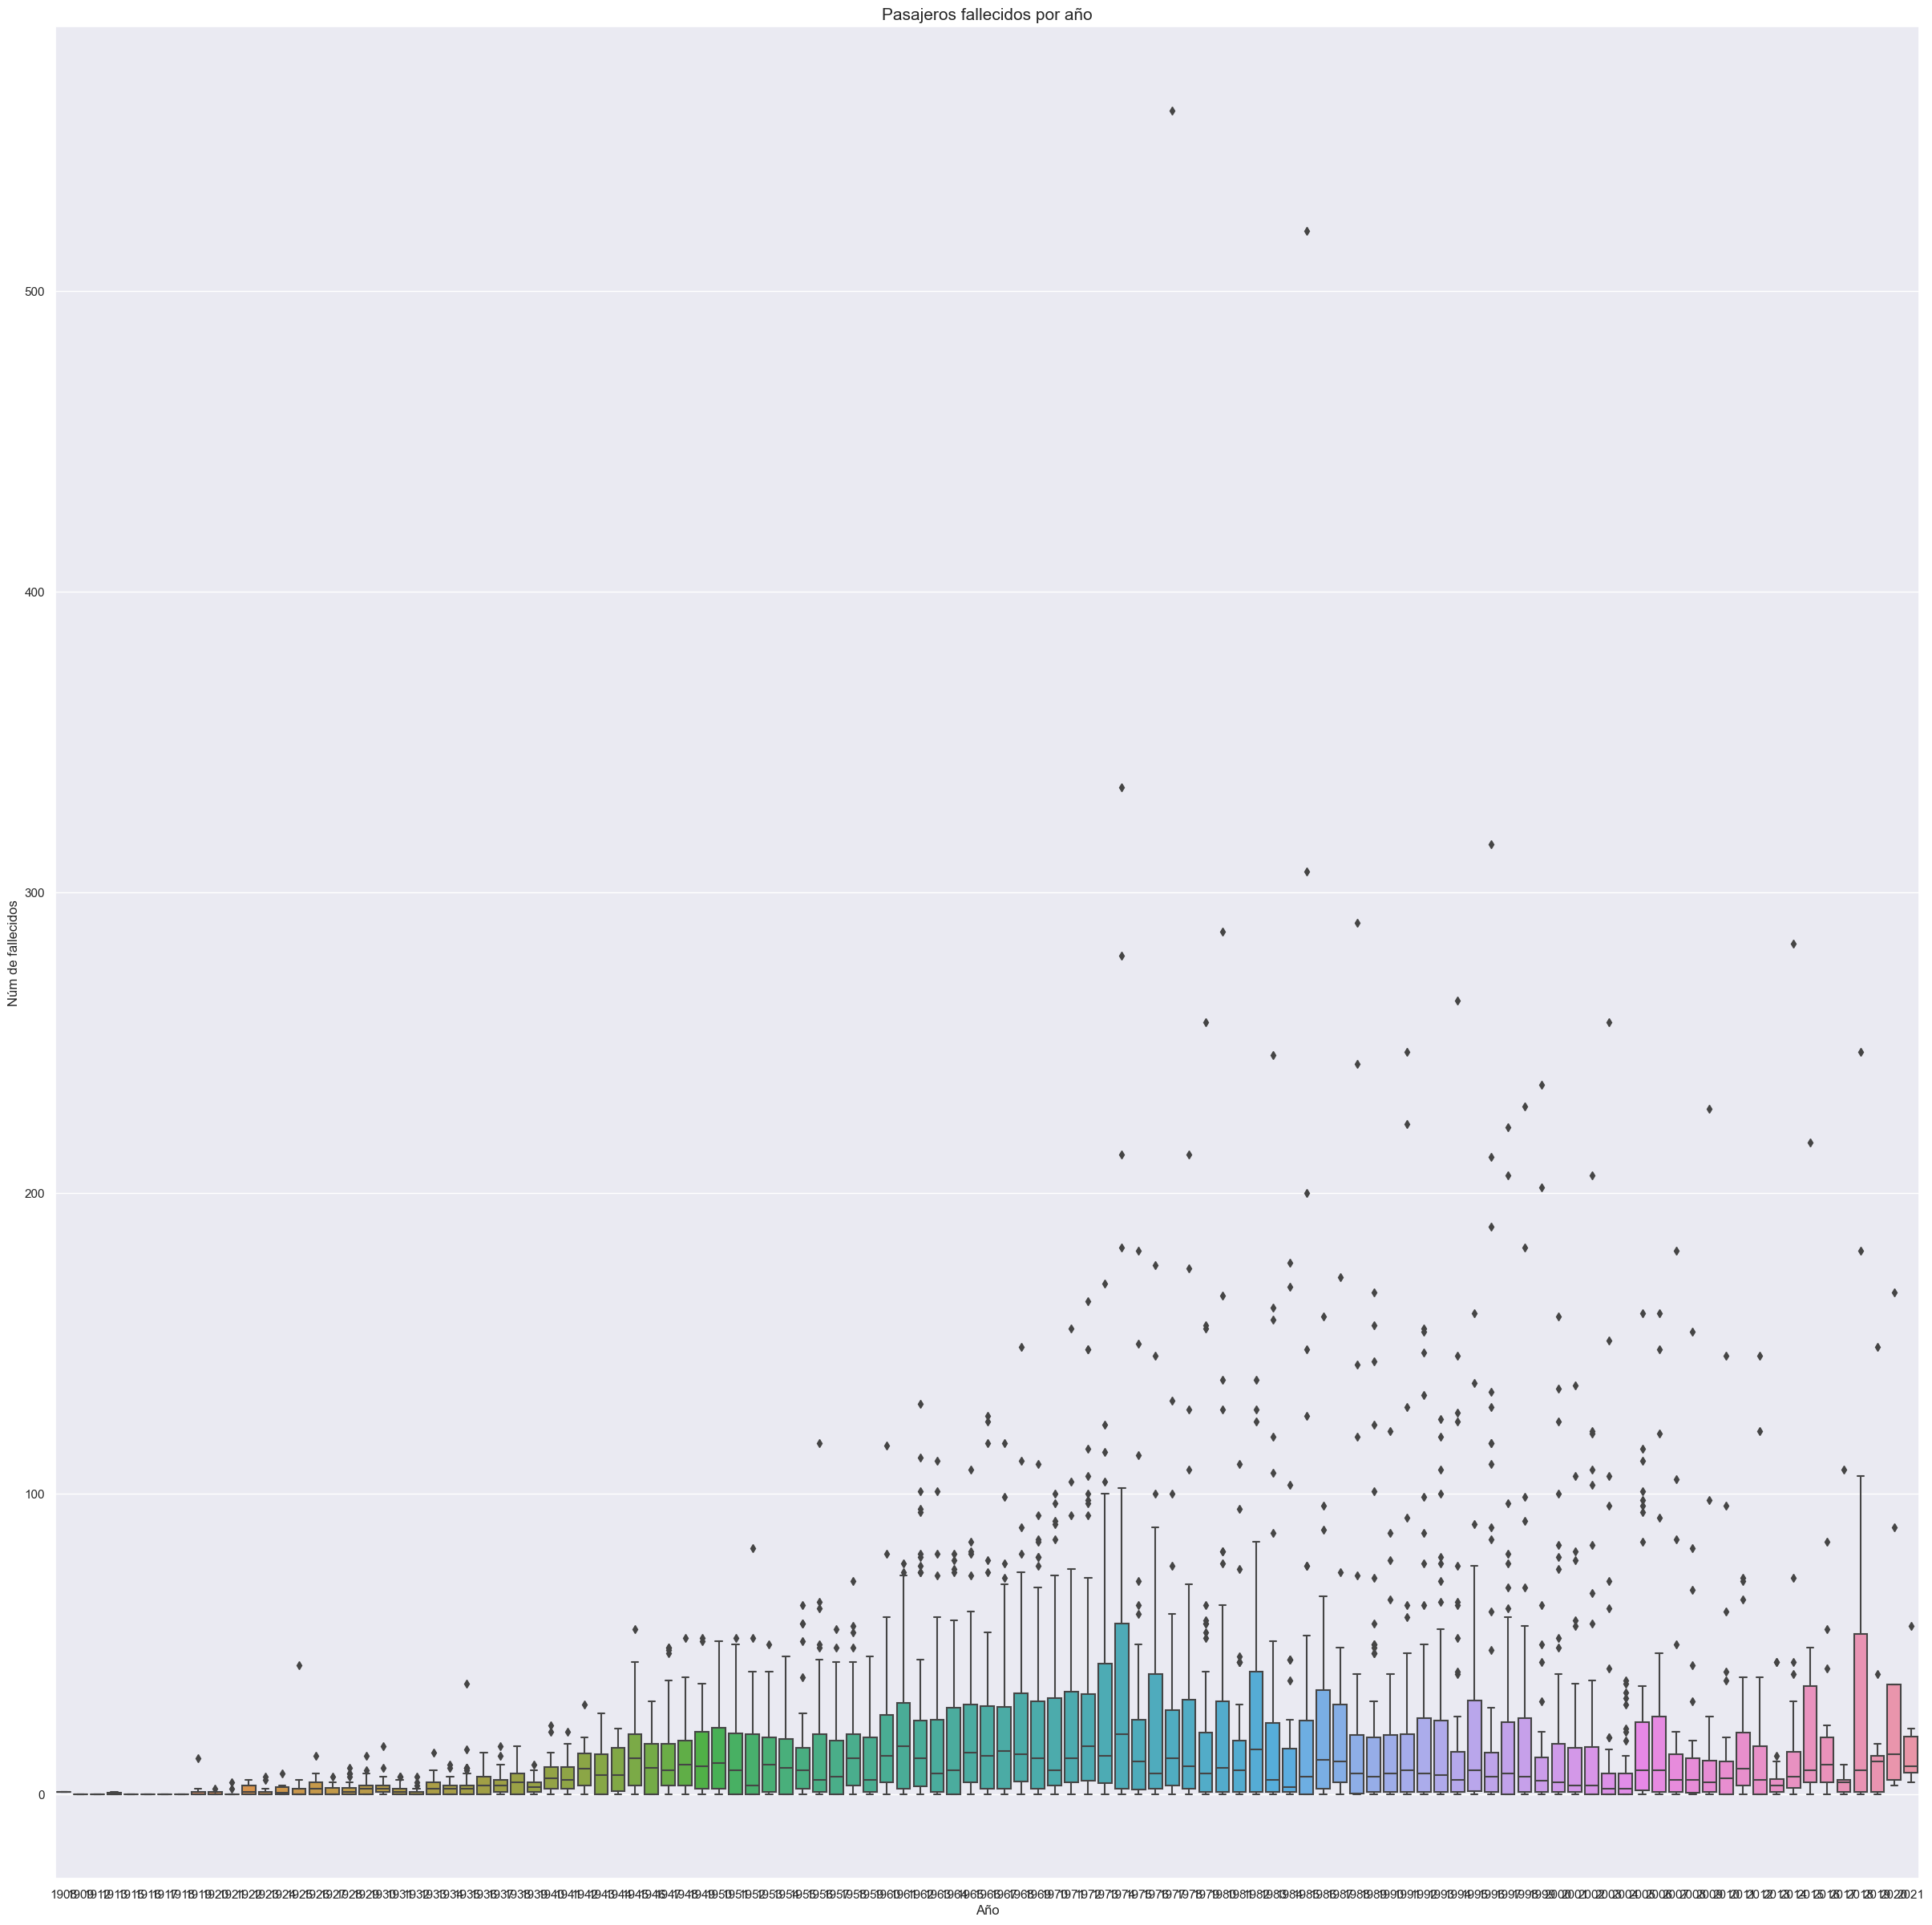

In [27]:
# Graph
plt.figure(figsize=(30, 30))
sns.boxplot(x="year", y="passenger_fatalities", data=df_new)
plt.title("Pasajeros fallecidos por año", fontsize=15)
plt.xlabel("Año")
plt.ylabel("Núm de fallecidos")
plt.savefig("Pass_fatal.jpg")

In [13]:
# Graph for deceased crew members
df_new['crew_fatalities'] = pd.to_numeric(df_new['crew_fatalities'], errors='coerce')

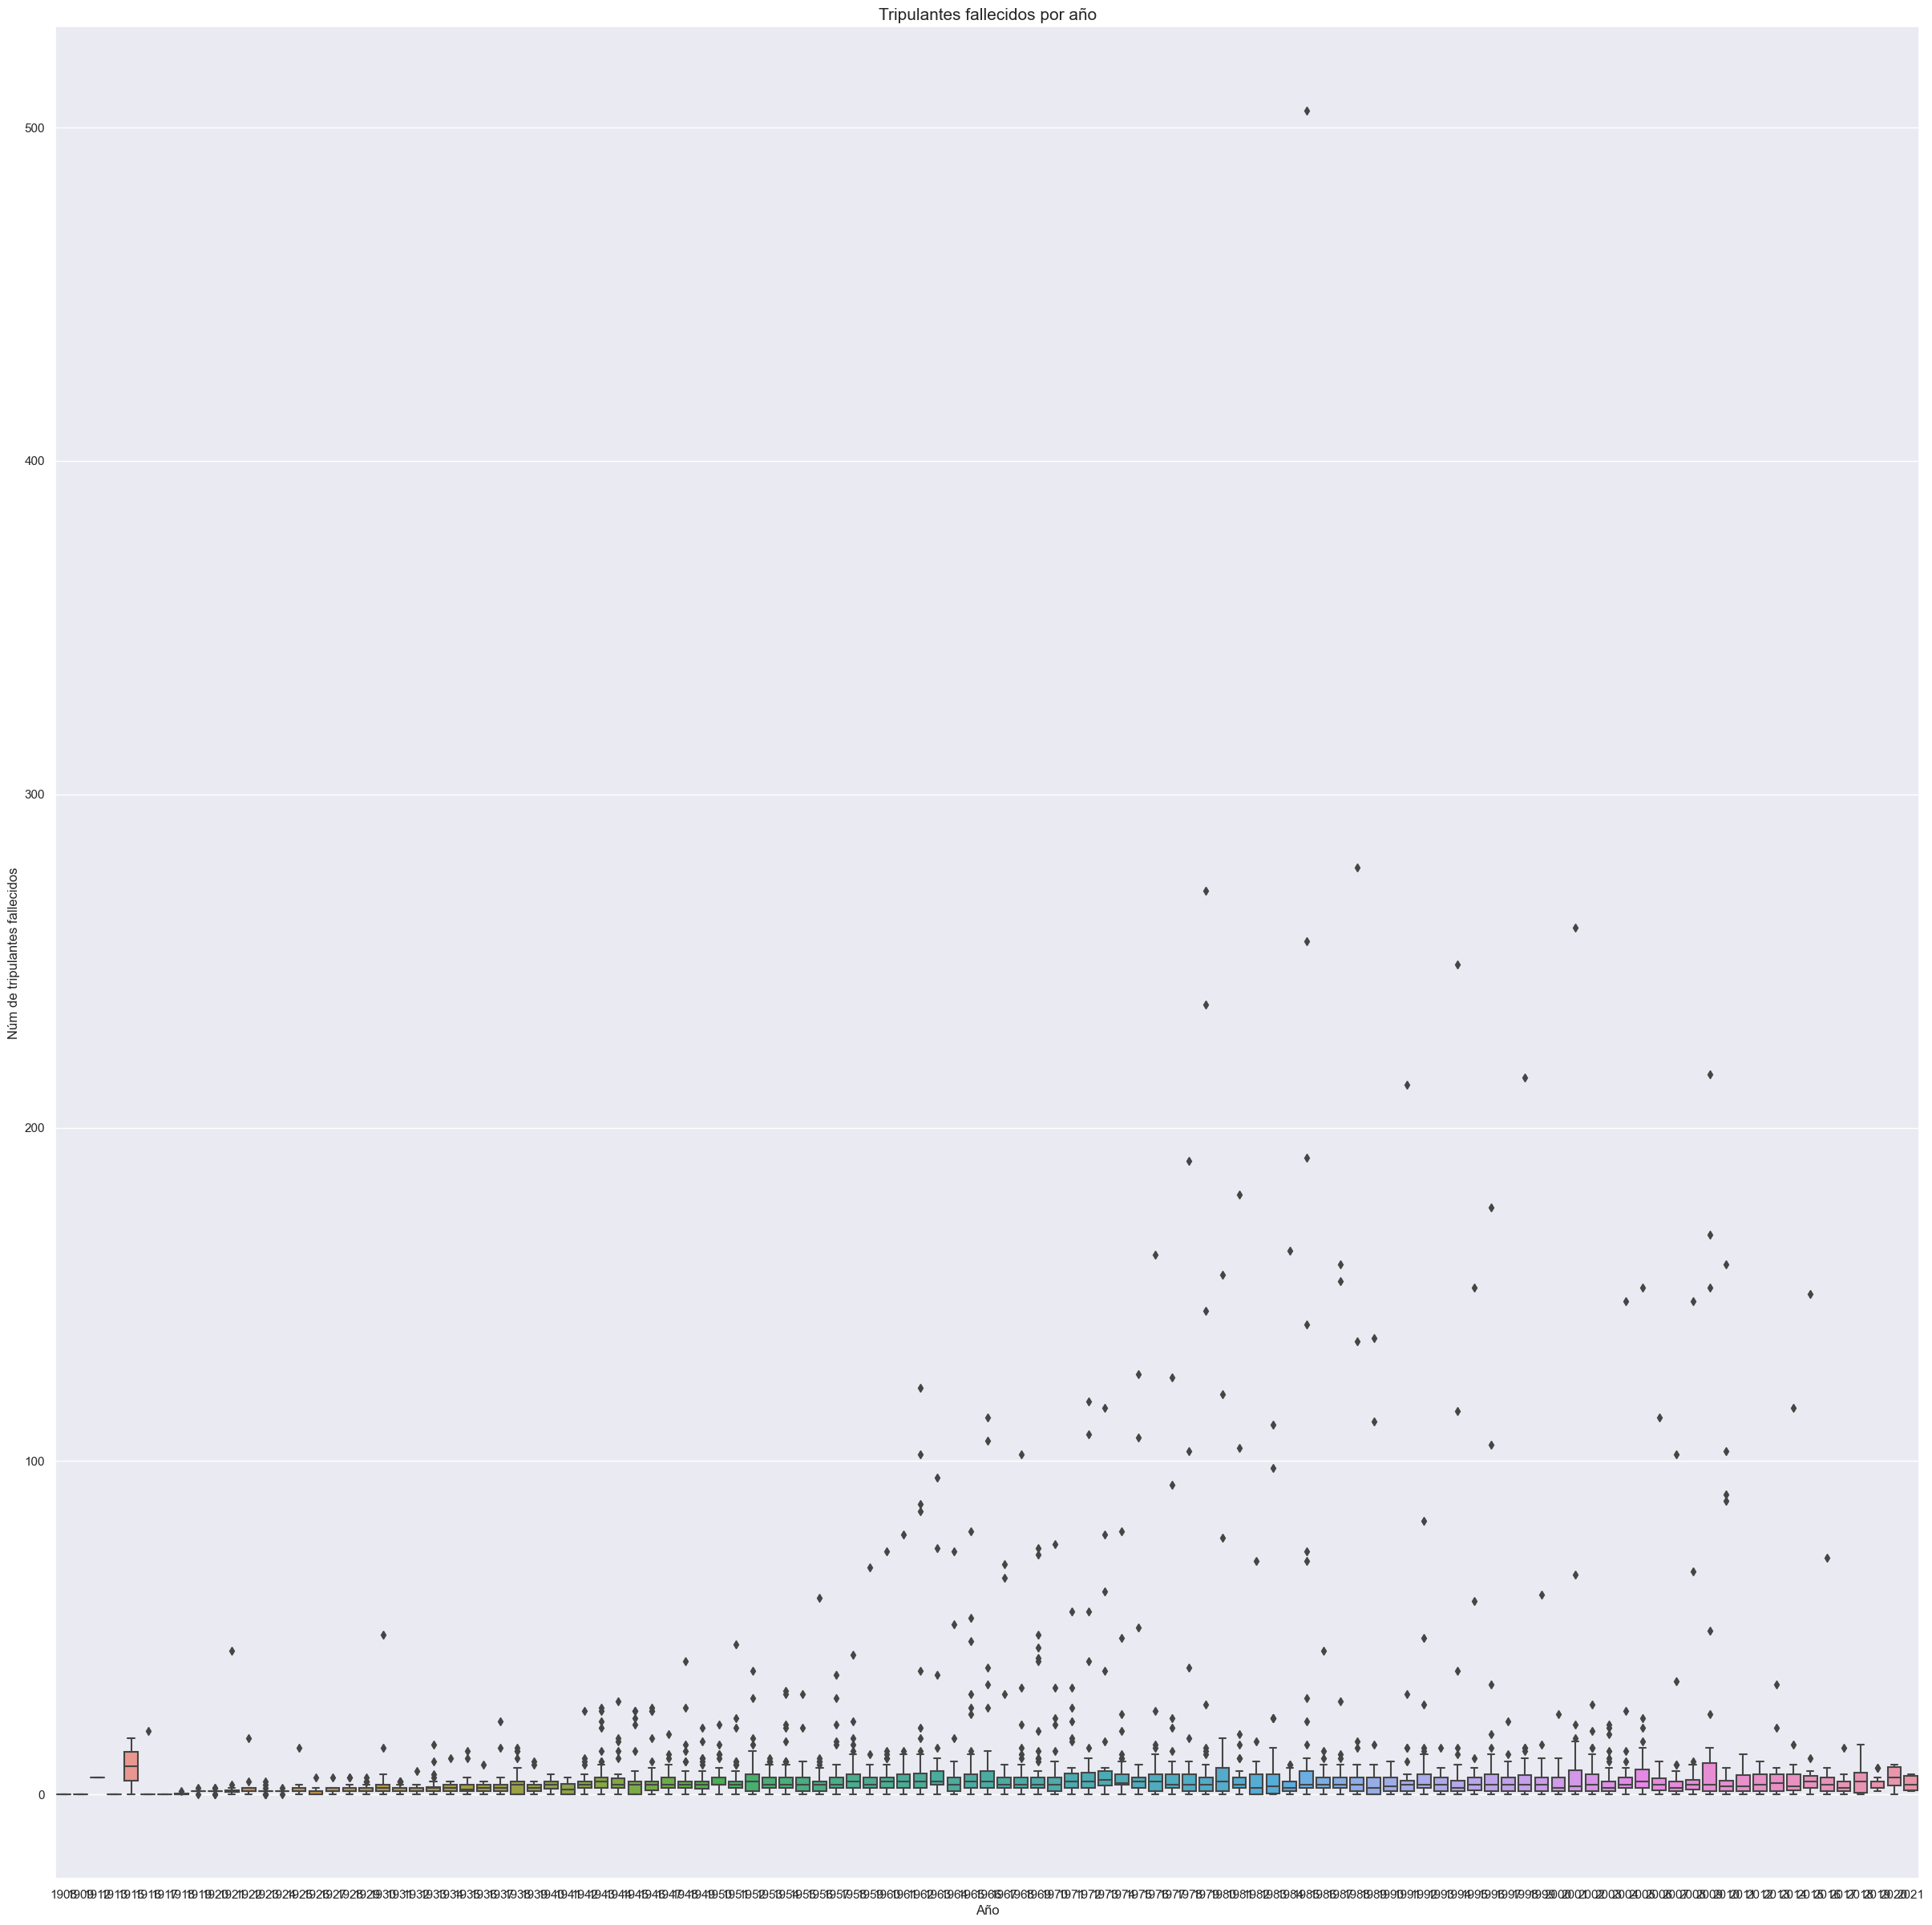

In [28]:
# Graph
plt.figure(figsize=(30, 30))
sns.boxplot(x="year", y="crew_fatalities", data=df_new)
plt.title("Tripulantes fallecidos por año", fontsize=15)
plt.xlabel("Año")
plt.ylabel("Núm de tripulantes fallecidos")
plt.savefig("Crew_fatal.jpg")

In [15]:
# Some queries:
# See the deaths of the year 2001
df_pas2001 = df_new[df_new['year'] == 2001]['passenger_fatalities'].sum()

In [16]:
print(df_pas2001)

851.0


In [17]:
# See the deaths of the year 2011
df_pas2011 = df_new[df_new['year'] == 2011]['passenger_fatalities'].sum()

In [18]:
print(df_pas2011)

555.0


In [19]:
# Create a new column that contains the difference between passengers who died in the years 2001 and 2011
diferencia = df_pas2011 - df_pas2001

In [20]:
diferencia

-296.0

In [21]:
# Creates a new column that contains the percentage difference between passengers who died in the years 2001 and 2011
diferencia_porcentual = ((df_pas2011 - df_pas2001) / df_pas2011) * 100

In [22]:
diferencia_porcentual     # 53,33% reduction

-53.333333333333336

In [23]:
# See the deceased in 2021
df_pas2021 = df_new[df_new['year'] == 2021]['passenger_fatalities'].sum()

In [24]:
# Create a new column that contains the percentage difference between passengers who died in the years 2011 and 2021
diferencia_porcentual = ((df_pas2021 - df_pas2011) / df_pas2021) * 100

In [25]:
diferencia_porcentual     # 413,88% reduction

-413.8888888888889

In [26]:
#We save the rest of the data in a .csv file
df_new.to_csv('Accidentes_final.csv', index=False)